## Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df =  pd.read_csv(r"../data/MIT-BIH Arrhythmia Database.csv")

## Feature Engineering

In [5]:
#create other features derived form thses columsn
df['rr_ratio'] = df['0_post-RR'] / df['0_pre-RR']  # Heart rate variability
df['qt_corrected'] = df['0_qt_interval'] / np.sqrt(df['0_post-RR'])  # QTc
df['beat_consistency'] = abs(df['0_qrs_interval'] - df['1_qrs_interval']) # Beat-to-beat variation
# Measure beat-to-beat variability by computing the standard deviation of pre-RR and post-RR intervals (HRV indicator)
df['rr_std'] = df[['0_pre-RR', '0_post-RR']].std(axis=1)
# Compute the difference in QT intervals between two consecutive beats to detect repolarization instability
df['qt_diff'] = df['0_qt_interval'] - df['1_qt_interval']

## Handling Missing Data & outliers

In [6]:
missing_summary = df.isnull().sum()
print("Missing Values per column: ")
print(missing_summary[missing_summary > 0])

Missing Values per column: 
Series([], dtype: int64)


no missing value

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
for col in df.select_dtypes('number'):
    Q1 = df[col].quantile(0.25)  
    Q3 = df[col].quantile(0.75) 
    IQR = Q3 - Q1  
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    print(f"Outliers of {col} is = {len(outliers)}")

Outliers of record is = 0
Outliers of 0_pre-RR is = 2134
Outliers of 0_post-RR is = 2201
Outliers of 0_pPeak is = 3331
Outliers of 0_tPeak is = 385
Outliers of 0_rPeak is = 5383
Outliers of 0_sPeak is = 2
Outliers of 0_qPeak is = 8548
Outliers of 0_qrs_interval is = 1351
Outliers of 0_pq_interval is = 2686
Outliers of 0_qt_interval is = 7496
Outliers of 0_st_interval is = 15786
Outliers of 0_qrs_morph0 is = 8548
Outliers of 0_qrs_morph1 is = 10215
Outliers of 0_qrs_morph2 is = 3631
Outliers of 0_qrs_morph3 is = 2177
Outliers of 0_qrs_morph4 is = 3510
Outliers of 1_pre-RR is = 2134
Outliers of 1_post-RR is = 2201
Outliers of 1_pPeak is = 6643
Outliers of 1_tPeak is = 1947
Outliers of 1_rPeak is = 10465
Outliers of 1_sPeak is = 7802
Outliers of 1_qPeak is = 4100
Outliers of 1_qrs_interval is = 3203
Outliers of 1_pq_interval is = 4479
Outliers of 1_qt_interval is = 2142
Outliers of 1_st_interval is = 8861
Outliers of 1_qrs_morph0 is = 4100
Outliers of 1_qrs_morph1 is = 4088
Outliers of 1_

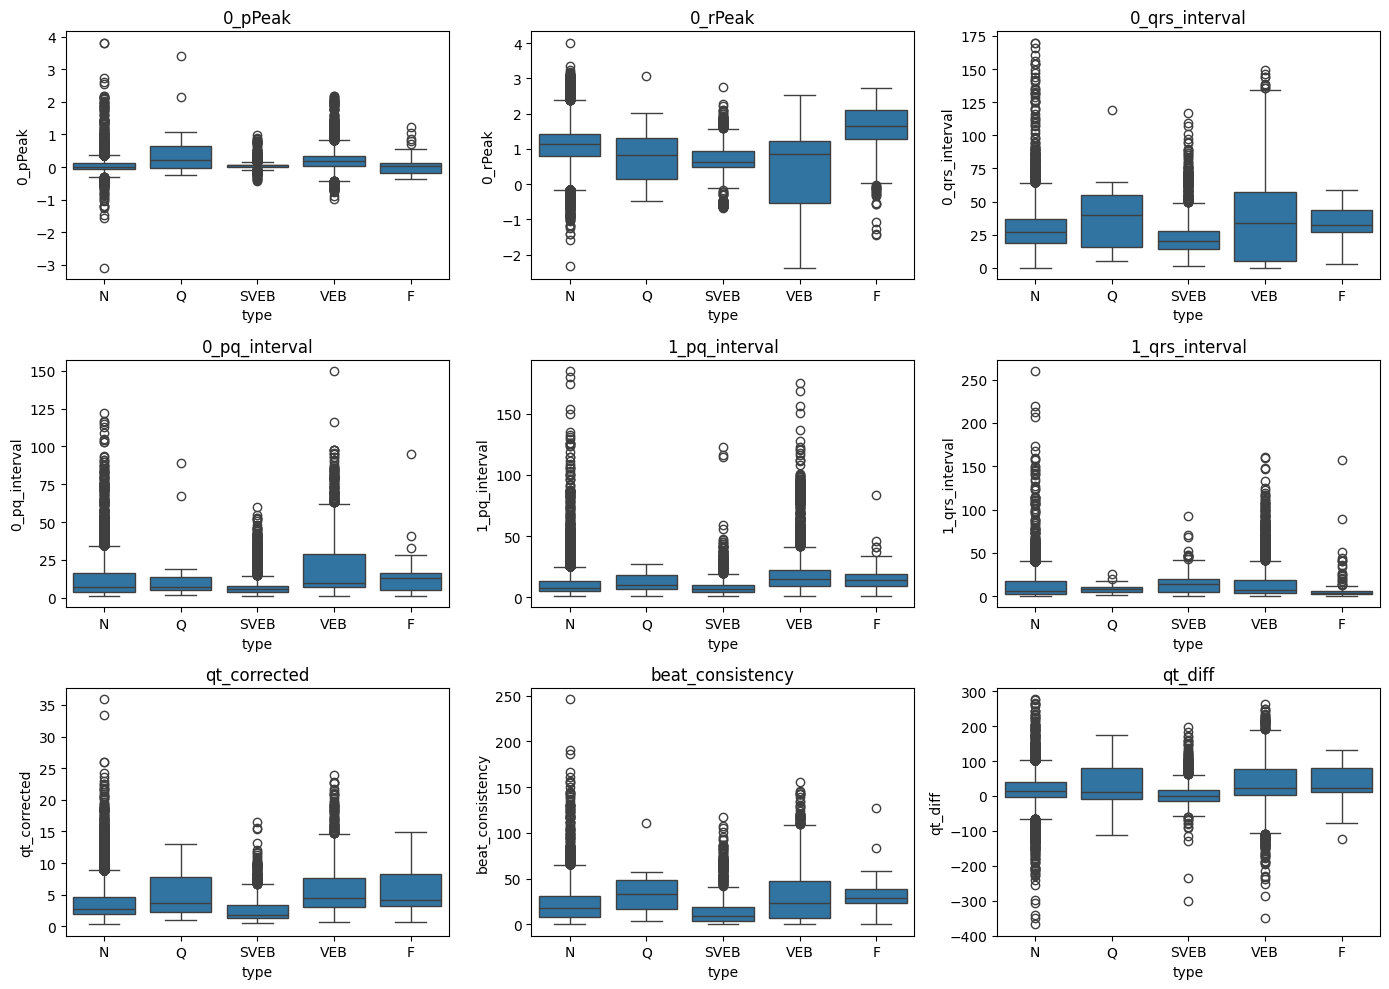

In [9]:
outlier_columns_to_handle = [
    '0_pPeak',         # ŸÇŸÖÿ© ÿßŸÑŸÖŸàÿ¨ÿ© P - ŸÖŸÖŸÉŸÜ ÿ™ŸÉŸàŸÜ ÿ¥ÿßÿ∞ÿ© ÿ®ÿ≥ÿ®ÿ® noise
    '0_rPeak',         # R Peak - ÿ™Ÿàÿ≤ŸäÿπŸáÿß ÿ®ŸäŸÉŸàŸÜ ŸÇŸàŸäÿå ÿ®ÿ≥ ŸÖŸÖŸÉŸÜ ŸÅŸäŸá artifacts
    '0_qrs_interval',  # ŸÖÿØÿ© QRS - ŸÑŸà ÿ™Ÿàÿ≤ŸäÿπŸáÿß skewed ÿ¨ÿØŸãÿß
    '0_pq_interval',   # ŸÖŸÖŸÉŸÜ ÿ™ÿ™ÿ£ÿ´ÿ± ÿ®ÿ≠ÿßŸÑÿßÿ™ ÿÆÿ∑ÿ£
    '1_pq_interval',   # ŸÜŸÅÿ≥ ÿßŸÑŸÅŸÉÿ±ÿ©
    '1_qrs_interval',
    'qt_corrected',    # ÿßŸÜÿ™ ÿπŸÖŸÑÿ™ŸÑŸá feature engineering - ÿÆŸÑŸä ŸÜÿ≥ÿÆÿ© ŸÖŸÜŸá
    'beat_consistency',# ÿßÿÆÿ™ŸÑÿßŸÅ beat ŸÑ beat - ÿßŸÑŸÖŸÅÿ±Ÿàÿ∂ ŸÖÿ¥ Ÿäÿ®ŸÇŸâ ÿ∂ÿÆŸÖ ÿ¨ÿØŸãÿß
    'qt_diff'          # ŸÖÿ¥ÿ™ŸÇ - ŸÅŸÑŸà ÿ∑ÿßŸÑÿπ ÿ¥ÿßÿ∞ ÿ¨ÿØŸãÿß ŸÖŸÖŸÉŸÜ Ÿäÿ®ŸÇŸâ ŸÜÿ™Ÿäÿ¨ÿ© ÿ¥ÿ∞Ÿàÿ∞ ÿ£ÿµŸÑŸä
]

columns_to_leave = [
    '0_pre-RR', '0_post-RR',      # ŸÖÿπÿØŸÑ ŸÜÿ®ÿ∂ ‚Äì ŸÖŸÖŸÉŸÜ ŸÅÿπŸÑŸäŸãÿß Ÿäÿ®ŸÇŸâ ŸÖŸÜÿÆŸÅÿ∂ ÿ¨ÿØŸãÿß ÿ£Ÿà ŸÖÿ±ÿ™ŸÅÿπ ÿ¨ÿØŸãÿß
    '1_pre-RR', '1_post-RR',      # ŸÜŸÅÿ≥ ÿßŸÑŸÅŸÉÿ±ÿ©
    'rr_ratio',                   # ŸÖŸÖŸÉŸÜ ŸäÿØŸÑ ÿπŸÑŸâ ŸÅÿ±ŸÇ ŸÉÿ®Ÿäÿ± ŸÅŸä ŸÖÿπÿØŸÑ ÿ∂ÿ±ÿ®ÿßÿ™ ÿßŸÑŸÇŸÑÿ®
    '1_rPeak', '1_sPeak',         # ÿ≥ÿπÿ© ÿßŸÑÿ∞ÿ±Ÿàÿ© R/S ‚Äì ŸÑŸà ŸÅÿπŸÑŸäŸãÿß ÿßŸÑŸÇŸÑÿ® ÿ∂ÿπŸäŸÅ ÿ£Ÿà ŸÇŸàŸä
    '1_tPeak', '0_tPeak',         # T wave ‚Äì ŸÖŸÖŸÉŸÜ ÿ™ÿ™ÿ∫Ÿäÿ± ŸÅÿπŸÑŸäŸãÿß ŸÖÿπ ÿßŸÑŸÖÿ±ÿ∂
]

plt.figure(figsize=(14, 10))
for i, col in enumerate(outlier_columns_to_handle, 1):
    plt.subplot(3, 3, i)  
    sns.boxplot(data=df, x='type', y=df[col])
    plt.title(col)
plt.tight_layout()  
plt.show()

### üìä ÿ™ÿ≠ŸÑŸäŸÑ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ© ÿ≠ÿ≥ÿ® ŸÜŸàÿπ ŸÜÿ®ÿ∂ÿ© ÿßŸÑŸÇŸÑÿ®

ÿßŸÑŸÖÿÆÿ∑ÿ∑ÿßÿ™ ÿßŸÑÿµŸÜÿØŸàŸÇŸäÿ© ŸÅŸä ÿßŸÑÿ£ÿπŸÑŸâ ÿ™Ÿàÿ∂ÿ≠ ÿ™Ÿàÿ≤Ÿäÿπ ŸÖÿ¨ŸÖŸàÿπÿ© ŸÖŸÜ ÿßŸÑÿÆÿµÿßÿ¶ÿµ (features) ÿßŸÑŸÖÿ≥ÿ™ÿÆÿ±ÿ¨ÿ© ŸÖŸÜ ÿ•ÿ¥ÿßÿ±ÿßÿ™ ÿßŸÑŸÇŸÑÿ® (ECG) ÿπÿ®ÿ± ÿ£ŸÜŸàÿßÿπ ŸÖÿÆÿ™ŸÑŸÅÿ© ŸÖŸÜ ŸÜÿ®ÿ∂ÿßÿ™ ÿßŸÑŸÇŸÑÿ® (`N`, `Q`, `SVEB`, `VEB`, `F`). ÿßŸÑŸáÿØŸÅ ŸÖŸÜŸáÿß ŸáŸà ÿßŸÑÿ™ÿπÿ±ŸÅ ÿπŸÑŸâ Ÿàÿ¨ŸàÿØ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ© (Outliers) ŸàŸÉŸäŸÅ ÿ™ÿÆÿ™ŸÑŸÅ ÿ®ÿßÿÆÿ™ŸÑÿßŸÅ ŸÜŸàÿπ ÿßŸÑŸÜÿ®ÿ∂ÿ©.

- ÿ®ÿπÿ∂ ÿßŸÑÿÆÿµÿßÿ¶ÿµ ŸÖÿ´ŸÑ `qt_diff` Ÿà `beat_consistency` Ÿà `1_qrs_interval` ÿ™Ÿèÿ∏Ÿáÿ± ÿπÿØÿØŸãÿß ŸÉÿ®Ÿäÿ±Ÿãÿß ŸÖŸÜ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ©ÿå ÿÆÿßÿµÿ© ŸÅŸä ÿßŸÑŸÜÿ®ÿ∂ÿßÿ™ ÿ∫Ÿäÿ± ÿßŸÑÿ∑ÿ®ŸäÿπŸäÿ© ŸÖÿ´ŸÑ `VEB` Ÿà `F`.
- ŸÅŸä ÿßŸÑŸÖŸÇÿßÿ®ŸÑÿå ÿÆÿµÿßÿ¶ÿµ ŸÖÿ´ŸÑ `0_pPeak` Ÿà `0_rPeak` ÿ™Ÿàÿ≤ŸäÿπŸáÿß ÿ£ŸÇÿ±ÿ® ŸÑŸÑÿ∑ÿ®ŸäÿπŸäÿå ŸÑŸÉŸÜŸáÿß ŸÖÿß ÿ≤ÿßŸÑÿ™ ÿ™ÿ≠ÿ™ŸàŸä ÿπŸÑŸâ ÿ®ÿπÿ∂ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿÆÿßÿ±ÿ¨ÿ© ÿπŸÜ ÿßŸÑŸÜÿ∑ÿßŸÇ ÿßŸÑŸÖÿ™ŸàŸÇÿπ.
- ŸÖŸÜ ÿßŸÑŸÖŸáŸÖ ŸÖŸÑÿßÿ≠ÿ∏ÿ© ÿ£ŸÜ Ÿáÿ∞Ÿá ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ© ŸÇÿØ ÿ™ŸÜÿ™ÿ¨ ÿπŸÜ ÿ∂Ÿàÿ∂ÿßÿ° ÿßŸÑŸÇŸäÿßÿ≥ ÿ£Ÿà ÿßÿÆÿ™ŸÑÿßŸÅÿßÿ™ ŸÅÿ≥ŸäŸàŸÑŸàÿ¨Ÿäÿ© ÿ∑ÿ®ŸäÿπŸäÿ© ÿ®ŸäŸÜ ÿßŸÑŸÖÿ±ÿ∂Ÿâ.

üìå **ÿßŸÑÿÆŸÑÿßÿµÿ©**: ÿßŸÑÿ™ÿπÿßŸÖŸÑ ŸÖÿπ ÿßŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ© ÿ£ŸÖÿ± ÿ∂ÿ±Ÿàÿ±Ÿä ŸÇÿ®ŸÑ ÿßŸÑÿ™ÿØÿ±Ÿäÿ®ÿå ŸàÿØŸá ŸÖŸÖŸÉŸÜ Ÿäÿ¥ŸÖŸÑ ÿ™ŸÇŸÜŸäÿßÿ™ ŸÖÿ´ŸÑ:

> ÿßŸÑŸÖÿπÿßŸÑÿ¨ÿ© ÿßŸÑŸÖŸÜÿßÿ≥ÿ®ÿ© ŸÑŸÑŸÇŸäŸÖ ÿßŸÑÿ¥ÿßÿ∞ÿ© ŸÇÿØ ÿ™ÿ≥ÿßŸáŸÖ ŸÅŸä ÿ™ÿ≠ÿ≥ŸäŸÜ ÿØŸÇÿ© ÿßŸÑŸÜŸÖŸàÿ∞ÿ¨ Ÿàÿßÿ≥ÿ™ŸÇÿ±ÿßÿ±Ÿá.

In [10]:
y = df['type']
df = df.drop(columns=['type'])

In [12]:
from sklearn.preprocessing import LabelEncoder
import joblib

le = LabelEncoder()
y_encoded = le.fit_transform(y)

joblib.dump(le, r"../models/label_encoder.pkl")

['../models/label_encoder.pkl']

# Data preprocessing Pipeline

In [42]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import FunctionTransformer, StandardScaler
from sklearn.compose import ColumnTransformer
import numpy as np
import pandas as pd

# ================== Transformation Functions ==================

def rr_ratio_func(x):
    if isinstance(x, pd.DataFrame):
        x = x.to_numpy()
    denom = np.where(x[:, [1]] == 0, np.nan, x[:, [1]])
    return x[:, [0]] / denom

def qt_corrected_func(x):
    if isinstance(x, pd.DataFrame):
        x = x.to_numpy()
    return x[:, [0]] / np.sqrt(x[:, [1]])

def beat_consistency_func(x):
    if isinstance(x, pd.DataFrame):
        x = x.to_numpy()
    return abs(x[:, [0]] - x[:, [1]])

def rr_std_func(x):
    if isinstance(x, pd.DataFrame):
        x = x.to_numpy()
    return np.std(x, axis=1, keepdims=True)

def qt_diff_func(x):
    if isinstance(x, pd.DataFrame):
        x = x.to_numpy()
    return x[:, [0]] - x[:, [1]]

# ================== Safe Log Function ==================

def safe_log1p(x):
    x = np.where(x <= -1, 0, x)
    return np.log1p(x)

# ================== Feature Name Out Functions ==================

def get_rr_ratio_name(_): return ["rr_ratio"]
def get_qt_corrected_name(_): return ["qt_corrected"]
def get_beat_consistency_name(_): return ["beat_consistency"]
def get_rr_std_name(_): return ["rr_std"]
def get_qt_diff_name(_): return ["qt_diff"]
def get_log_trans_names(transformer, input_features): return input_features

# ================== Pipelines for Derived Features ==================

def rr_ratio_pipeline():
    return make_pipeline(
        FunctionTransformer(rr_ratio_func, feature_names_out=get_rr_ratio_name),
        StandardScaler()
    )

def qt_corrected_pipeline():
    return make_pipeline(
        FunctionTransformer(qt_corrected_func, feature_names_out=get_qt_corrected_name),
        FunctionTransformer(safe_log1p, inverse_func=np.expm1, check_inverse=False),
        StandardScaler()
    )

def beat_consistency_pipeline():
    return make_pipeline(
        FunctionTransformer(beat_consistency_func, feature_names_out=get_beat_consistency_name),
        FunctionTransformer(safe_log1p, inverse_func=np.expm1, check_inverse=False),
        StandardScaler()
    )

def rr_std_pipeline():
    return make_pipeline(
        FunctionTransformer(rr_std_func, feature_names_out=get_rr_std_name),
        StandardScaler()
    )

def qt_diff_pipeline():
    return make_pipeline(
        FunctionTransformer(qt_diff_func, feature_names_out=get_qt_diff_name),
        FunctionTransformer(safe_log1p, inverse_func=np.expm1, check_inverse=False),
        StandardScaler()
    )

# ================== Log + Scaling Pipeline ==================

log_pipeline = make_pipeline(
    FunctionTransformer(
        safe_log1p,
        inverse_func=np.expm1,
        feature_names_out=get_log_trans_names,
        check_inverse=False
    ),
    StandardScaler()
)

# ================== Default Scaling Pipeline ==================

default_pipeline = make_pipeline(StandardScaler())

# ================== Full Preprocessing Pipeline ==================

# Define the columns that need log scaling
outlier_columns_to_handle = [
    '0_pPeak', '0_tPeak', '0_rPeak', '0_sPeak', '0_qPeak',
    '1_pPeak', '1_tPeak', '1_rPeak', '1_sPeak', '1_qPeak'
]

preprocessing = ColumnTransformer([
    ("rr_ratio", rr_ratio_pipeline(), ["0_post-RR", "0_pre-RR"]),
    ("qt_corrected", qt_corrected_pipeline(), ["0_qt_interval", "0_post-RR"]),
    ("beat_consistency", beat_consistency_pipeline(), ["0_qrs_interval", "1_qrs_interval"]),
    ("rr_std", rr_std_pipeline(), ["0_pre-RR", "0_post-RR"]),
    ("qt_diff", qt_diff_pipeline(), ["0_qt_interval", "1_qt_interval"]),
    ("log", log_pipeline, outlier_columns_to_handle)
], remainder=default_pipeline, force_int_remainder_cols=False)

In [43]:
preprocessing.fit(df)

ColumnTransformer(force_int_remainder_cols=False,
                  remainder=Pipeline(steps=[('standardscaler',
                                             StandardScaler())]),
                  transformers=[('rr_ratio',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out=<function get_rr_ratio_name at 0x00000115CEFE7CE0>,
                                                                      func=<function rr_ratio_func at 0x00000115CEFA6A20>)),
                                                 ('standardscaler',
                                                  StandardScaler())...
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(check_inverse=False,
                                                                      feature_names_out=<function get_log_trans_names at 0x00000115CEFE63E0>,
                                                                      func=<function safe_log1p at 0x00000115CEFE6AC0>,
                                                                      inverse_func=<ufunc 'expm1'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 ['0_pPeak', '0_tPeak', '0_rPeak', '0_sPeak',
                                  '0_qPeak', '1_pPeak', '1_tPeak', '1_rPeak',
                                  '1_sPeak', '1_qPeak'])])

In [44]:
joblib.dump(preprocessing, r"../models/preprocessing_pipeline.pkl")

['../models/preprocessing_pipeline.pkl']

## Handling Class Imbalance
We will use SMOTE (Synthetic Minority Over-sampling Technique) to handle the class imbalance problem
by generating synthetic samples for the minority classes.